This file needs requires external data!

(Run on workstation)

In [35]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from alldata import AllData
from ensemble import EnsembleMember


np.set_printoptions(precision=2)
%matplotlib notebook
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Input parameters

In [36]:
#Choose starting year
#year0 = 1951
year0 = 1871

#Choose ensemble member
#ism = 'ISSM_UCI'
#ism = 'GRIS_LSC'
#ism = 'IMAU_UU'
ism = 'PISM_PIK'
#ism = 'PISM_DMI'
#ism = 'FETI_ULB'
#ism = 'CISM_NCA'
#esm = 'NorESM2-MM'
#esm = 'EC-Earth3'
esm = 'ACCESS-CM2'
#esm = 'CanESM5'
#esm = 'CAS-ESM2-0'
#esm = 'CAMS-CSM1-0'
#esm = 'MIROC6'
ssp = '245'

Computation

In [37]:
#Read data
ad = AllData()
ad.fitctrl=True
ad.gather(update=False)

#print(ad.ism)

#Compute iteration of ensemble member
ens = EnsembleMember(ad,ism=ism,esm=esm,ssp=ssp,year0=year0)
ens.niter = 40
ens.verbose=True
ens.usefanom = True
ens.iterate()#gamma=5.05)

Gathered all data
Calibrating gamma values
Using exponential fit through tanom
1 359.47233542543904
2 980.5491197073856
3 -79.31529551047493
4 -50.359515049700086
5 512.8406323641425
6 -1238.1232731337627
7 500.67681668688317
8 -220.90294688021098
9 -1135.799307371966
10 -36.26665474701992
11 -1695.2983616756214
12 1555.3408477735002
13 -2175.4299678715765
14 627.0677288363347
15 -1031.8530508562508
16 418.3509684882023
17 -274.6562338592313
18 -169.07070942233904
19 -86.30419542261909
20 -68.33575867932012
21 -54.72571421908546
22 -54.46713616131509
23 -54.473527420708436
23 -0.5446713616131509 -0.5447352742070843
Finished 40 iteration


Figure settings

In [33]:
plt.style.use('../src/style_paper')

mpl.rc('figure.subplot',left=.15)

savename = f'../draftfigs/single_ensemble.png'

Create and save figure

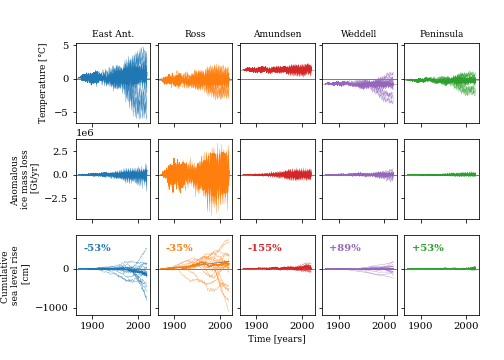

In [34]:
fig,ax = plt.subplots(3,5,sharex=True,sharey='row',figsize=(7,5))

#Choose variables to plot
varbs = [ens.TMP,ens.IML,100*ens.SLR]

for b,bas in enumerate(ens.basin.values):
    for v,var in enumerate(varbs):
        dax = ax[v,b]
        #Add reference lines
        if v==0:
            dax.axhline(ens.tref[b],0,1,c='.5',lw=.5)
        dax.axhline(0,0,1,c='k',lw=.5)

        #First iteration in grey
        dax.plot(ens.time,var[0,:,b],c='.5',lw=1)
        
        #Next iterations
        for n in range(1,ens.TMP.shape[0]):
            dax.plot(ens.time,var[n,:,b],c=ad.bcol[bas],lw=.3)
        dax.plot(ens.time,var[-1,:,b],c=ad.bcol[bas],lw=1)
        if v>1:
            dax.text(.1,.8,f"{100*((var[-1,-1,b]-var[-1,0,b])-(var[0,-1,b]-var[0,0,b]))/np.abs(var[0,-1,b]-var[0,0,b]):+.0f}%",transform=dax.transAxes,weight='bold',c=ad.bcol[bas])
        
    ax[0,b].set_title(bas)

ax[-1,2].set_xlabel('Time [years]')
ax[0,0].set_ylabel(r'Temperature [$\degree$C]')
#ax[1,0].set_ylabel('Basal melt \n anomaly \n [m/yr]')
ax[1,0].set_ylabel('Anomalous \n ice mass loss \n [Gt/yr]')
ax[2,0].set_ylabel('Cumulative \n sea level rise \n [cm]')
#ax[2,2].set_ylim([0,1])

plt.savefig(savename)
plt.show()